In [7]:
from GRID_2D import * 

import jax.numpy as jnp
import numpy as np # Often needed for defining the initial grid ranges
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt
import jax.numpy as jnp
import seaborn as snb
snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3

MAP estimate (alpha, beta) = (0.05, -0.05)


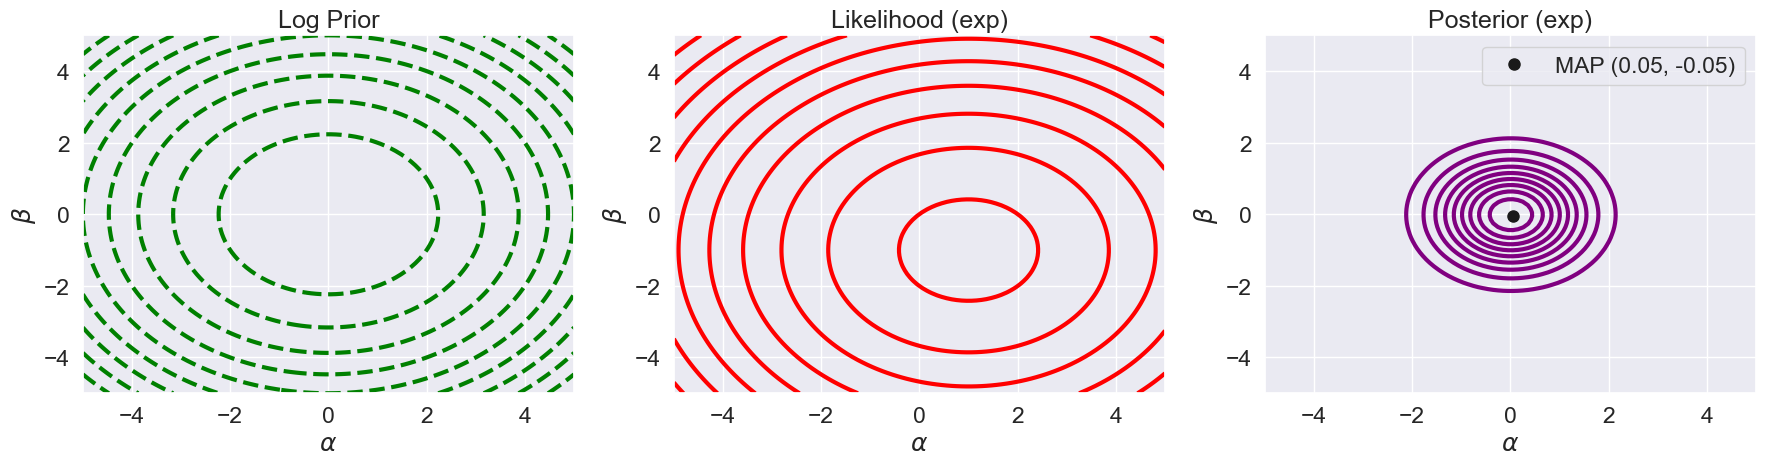

In [10]:
# 1. Define the grid range
alphas = np.linspace(-5, 5, 100) # Shape: (100,)
betas = np.linspace(-5, 5, 100)  # Shape: (100,)

# 2. Define mock Prior, Likelihood, Posterior functions (using log-probabilities)
def log_prior(a, b):
  """Example: Gaussian prior centered at (0,0)"""
  # Encourage values near origin
  return -0.5 * (a**2 + b**2) / (1**2) # Divide by variance (e.g., sigma=2) # shape (100, 100)

def log_likelihood(a, b):
  """Example: Likelihood suggesting peak near (1, -1)"""
  # Based on some fictional data, peaks around alpha=1, beta=-1
  return -0.5 * (((a - 1)**2) / (10**2) + ((b - (-1))**2) / (10**2)) # Sigma=0.5 # shape (100, 100)

def log_posterior(a, b):
  """Log Posterior = Log Prior + Log Likelihood (ignoring evidence)"""
  return log_prior(a, b) + log_likelihood(a, b)                          # shape (100, 100)

# 3. Create Grid2D instances for each component
prior_grid = Grid2D(alphas, betas, log_prior, name="Log Prior")                  # shape (100, 100)
likelihood_grid = Grid2D(alphas, betas, log_likelihood, name="Log Likelihood")   # shape (100, 100)
posterior_grid = Grid2D(alphas, betas, log_posterior, name="Log Posterior")      # shape (100, 100)

# 4. Find the Maximum A Posteriori (MAP) estimate
map_alpha, map_beta = posterior_grid.argmax                                      # shape (2,)
print(f"MAP estimate (alpha, beta) = ({map_alpha:.2f}, {map_beta:.2f})")

# 5. Plot the contours, using jnp.exp to show probability densities
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Log Prior (raw log-values)
prior_grid.plot_contours(axes[0], color='green', num_contours=10, f=lambda x: x) # Plot log-prior directly
axes[0].set_title("Log Prior") # Override default name slightly

# Plot Likelihood (exponentiated)
# Use f=jnp.exp to visualize the likelihood itself (proportional to probability)
likelihood_grid.plot_contours(axes[1], color='red', num_contours=10, f=jnp.exp)
axes[1].set_title("Likelihood (exp)")

# Plot Posterior (exponentiated)
# Use f=jnp.exp to visualize the posterior density (proportional to probability)
posterior_grid.plot_contours(axes[2], color='purple', num_contours=10, f=jnp.exp)
axes[2].set_title("Posterior (exp)")
axes[2].plot(map_alpha, map_beta, 'ko', markersize=8, label=f'MAP ({map_alpha:.2f}, {map_beta:.2f})')
axes[2].legend()


plt.tight_layout()
plt.show()